In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [26]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0135 - accuracy: 0.9951
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0110 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0107 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 18s 10m

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0853 - accuracy: 0.9834


[0.08527112752199173, 0.9833999872207642]

1/1 [==============================] - 0s 148ms/step
6


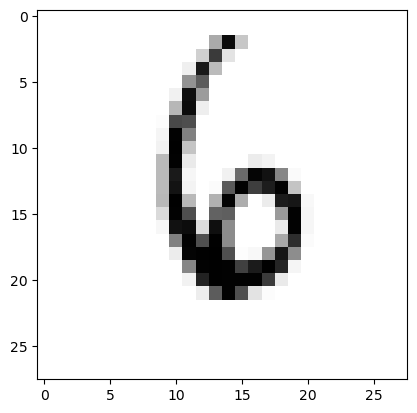

In [28]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [29]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)


313/313 [==============================] - 1s 4ms/step


In [30]:
y_predict[0]

array([6.5270268e-19, 5.2819125e-21, 5.4370711e-16, 2.0895195e-12,
       1.5820272e-20, 1.3306197e-22, 6.6564498e-33, 9.9999994e-01,
       4.8434535e-17, 3.1679320e-13], dtype=float32)

In [31]:
import numpy as np
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [32]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

C:\Users\SENTHIL-KUMAR-T-H\AppData\Local\Temp\ipykernel_12880\2379094767.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


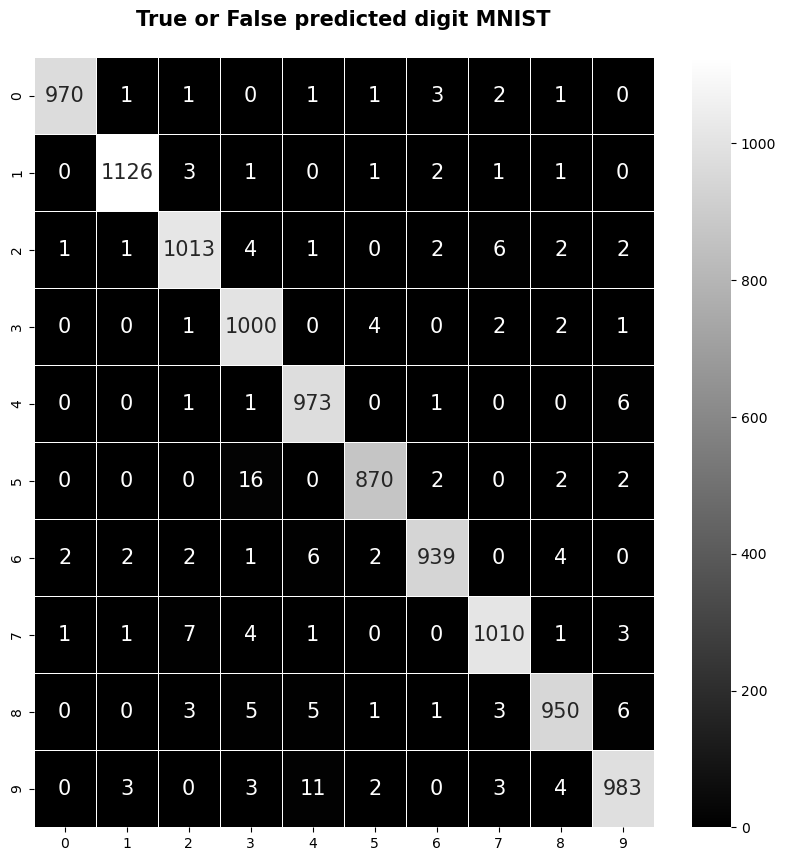

In [38]:
import seaborn as sns
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
0plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [61]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test[[3]])
y_predict_single[0]
y_predicts=np.argmax(y_predict_single, axis=1)

1/1 [==============================] - 0s 39ms/step


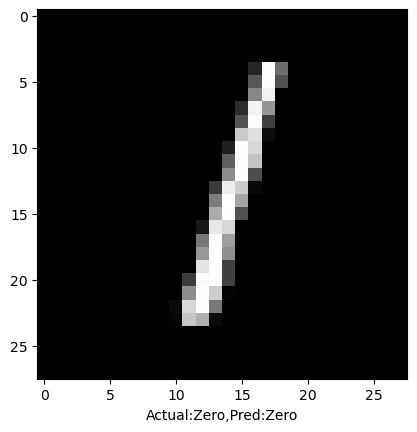

In [62]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test[3])],col_names[y_predicts[0]]))
plt.show()